# []

In [1]:
# inbuilt 
import os
import sys
import math

# most common
import numpy as np
import matplotlib.pyplot as plt

# pytorch
import torch as tt
import torch.nn as nn
import torch.optim as oo
import torch.functional as ff
import torch.distributions as dd
import torch.utils.data as ud

# custom
import known
import known.ktorch as kt
from known.basic import pj
print(f'{sys.version=}\n{np.__version__=}\n{tt.__version__=}\n{known.__version__=}')

sys.version='3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)]'
np.__version__='1.24.1'
tt.__version__='1.13.1+cpu'
known.__version__='0.0.1'


# Select DataSet

In [2]:
seqlen = 10
cols = ('1','2', '3')
input_size = len(cols)

ds_test  = kt.SeqDataset.from_csv(pj('data_rnn/sinu.csv'), cols=cols, 
                seqlen=seqlen, reverse=True, normalize=False, squeeze_label=True, dtype=tt.float32)
ds_train = kt.SeqDataset.from_csv(pj('data_rnn/sinu_train.csv'), cols=cols, 
                seqlen=seqlen, reverse=True, normalize=False, squeeze_label=True, dtype=tt.float32)
ds_val = kt.SeqDataset.from_csv(pj('data_rnn/sinu_test.csv'), cols=cols, 
                seqlen=seqlen, reverse=True, normalize=False, squeeze_label=True, dtype=tt.float32)

ds_train, ds_val, ds_test

(<known.ktorch.data.SeqDataset at 0x1b0616fd870>,
 <known.ktorch.data.SeqDataset at 0x1b05aedfe80>)

# Create Network

In [3]:
hidden_size = 32
num_layers = 3
class RnnMlp(nn.Module):

    def __init__(self, rnn_class) -> None:
        super().__init__()
        self.rnn_class = rnn_class
        rnnargs = dict(
            input_size=input_size, hidden_sizes=[hidden_size for _ in range(num_layers)], actF=tt.tanh, 
            batch_first=True, dtype=tt.float32, stack_output=True
        )
        if rnn_class is kt.ELMAN or rnn_class is kt.GRU or rnn_class is kt.MGU: 
            self.rnn = rnn_class(True, False, **rnnargs)
        elif rnn_class is kt.JANET:
            rnnargs['beta']=0.0
            self.rnn = rnn_class(True, False, **rnnargs)
        elif rnn_class is kt.LSTM:
            rnnargs['actC']=tt.tanh
            self.rnn = rnn_class(True, False, **rnnargs)
        elif rnn_class is kt.ELMANC or rnn_class is kt.GRUC or rnn_class is kt.MGUC: 
            self.rnn = rnn_class(True, **rnnargs)
        elif rnn_class is kt.JANETC:
            rnnargs['beta']=0.0
            self.rnn = rnn_class(True, **rnnargs)
        elif rnn_class is kt.LSTMC:
            rnnargs['actC']=tt.tanh
            self.rnn = rnn_class(True, **rnnargs)
        elif rnn_class is nn.RNN or rnn_class is nn.GRU or rnn_class is nn.LSTM:
            self.rnn = rnn_class(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, 
                                 batch_first=True)
        else:
            print('Invalid_RNN_Class')
            
        
        self.fc = nn.Linear(hidden_size, input_size)
        #self.fc = nn.Flatten()

    def forward(self, X):
        x, *_ = self.rnn(X)
        return self.fc(x[:, -1, :])


rnndict = dict(

    nnRNN = (RnnMlp(nn.RNN),  'tab:blue',), 
    ktRNN = (RnnMlp(kt.ELMAN), 'tab:red',),  
    ktRNNc = (RnnMlp(kt.ELMANC), 'tab:green',),  

    nnGRU = (RnnMlp(nn.GRU), 'tab:brown',), 
    ktGRU = (RnnMlp(kt.GRU), 'tab:olive',),   
    ktGRUc = (RnnMlp(kt.GRUC), 'blue', ),   

    ttLSTM = (RnnMlp(nn.LSTM), 'red',),
    ktLSTM = (RnnMlp(kt.LSTM), 'green',), 
    ktLSTMv = (RnnMlp(kt.LSTMC),'brown',  ), 

    ktJANET = (RnnMlp(kt.JANET), 'gold', ),  
    ktJANETc = (RnnMlp(kt.JANETC), 'tab:pink',), 

    ktMGU = (RnnMlp(kt.MGU), 'tab:orange',), 
    ktMGUc = (RnnMlp(kt.MGUC), 'tab:grey'  ),   

)

# Train

nnRNN <class 'torch.nn.modules.rnn.RNN'>
Training samples: [130]
Training batches: [5]
Validation samples: [50]
Validation batches: [1]
Start Training @ 2023-01-14 04:02:22.179473
-------------------------------------------
-------------------------------------------
Final Training Loss: [0.0008628849405795336]
Final Validation Loss: [0.0008050879696384072]
End Training @ 2023-01-14 04:02:28.175896, Elapsed Time: [0:00:05.996423]


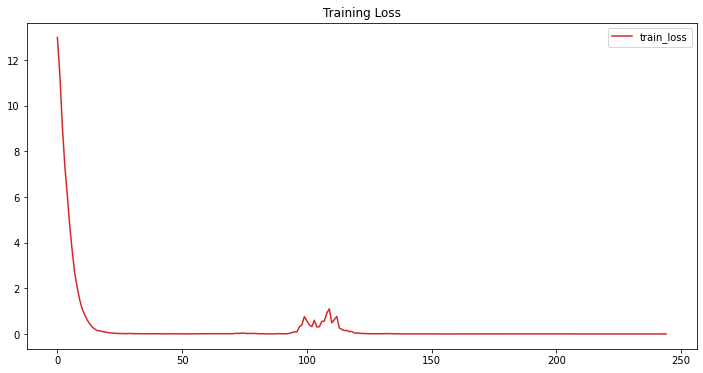

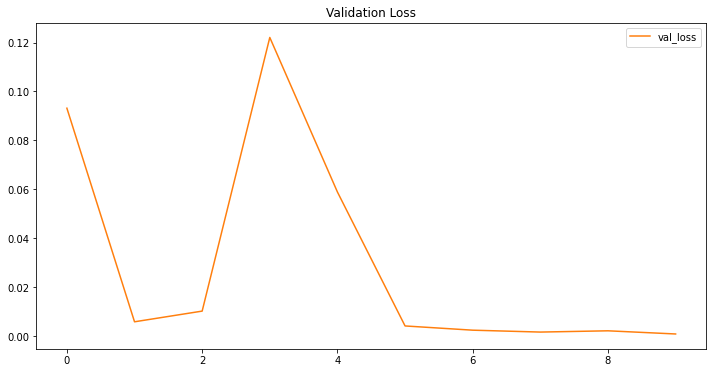

Testing samples: [190]
Testing batches: [1]
Testing Loss: 0.0008275608415715396
ktRNN <class 'known.ktorch.recurrent.rnn.ELMAN'>
Training samples: [130]
Training batches: [5]
Validation samples: [50]
Validation batches: [1]
Start Training @ 2023-01-14 04:02:28.382895
-------------------------------------------
-------------------------------------------
Final Training Loss: [0.0022860744851641358]
Final Validation Loss: [0.005969859194010496]
End Training @ 2023-01-14 04:02:36.110167, Elapsed Time: [0:00:07.727272]


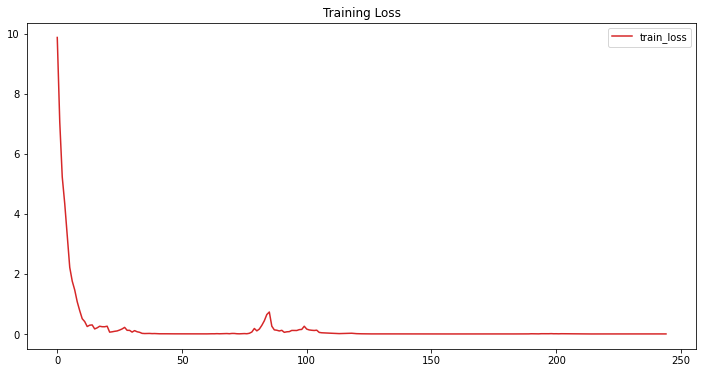

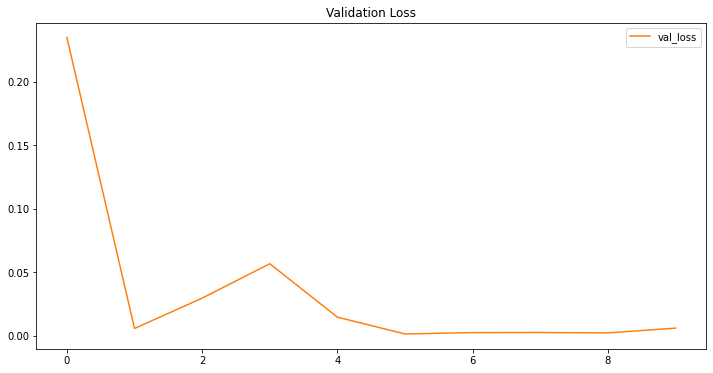

Testing samples: [190]
Testing batches: [1]
Testing Loss: 0.005452102981507778
ktRNNc <class 'known.ktorch.recurrent.rnnc.ELMANC'>
Training samples: [130]
Training batches: [5]
Validation samples: [50]
Validation batches: [1]
Start Training @ 2023-01-14 04:02:36.287214
-------------------------------------------
-------------------------------------------
Final Training Loss: [0.07763494178652763]
Final Validation Loss: [0.04141160845756531]
End Training @ 2023-01-14 04:02:42.254415, Elapsed Time: [0:00:05.967201]


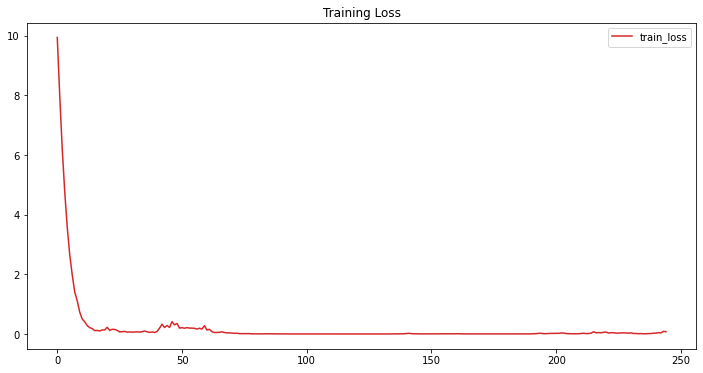

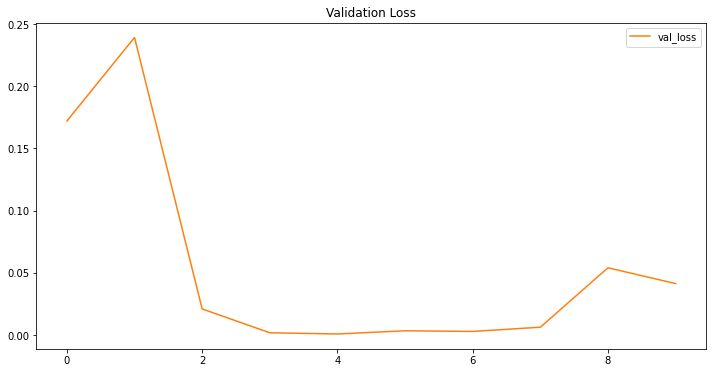

Testing samples: [190]
Testing batches: [1]
Testing Loss: 0.03957553580403328
nnGRU <class 'torch.nn.modules.rnn.GRU'>
Training samples: [130]
Training batches: [5]
Validation samples: [50]
Validation batches: [1]
Start Training @ 2023-01-14 04:02:42.428204
-------------------------------------------
-------------------------------------------
Final Training Loss: [0.00020496341821854002]
Final Validation Loss: [0.000275819911621511]
End Training @ 2023-01-14 04:02:54.061422, Elapsed Time: [0:00:11.633218]


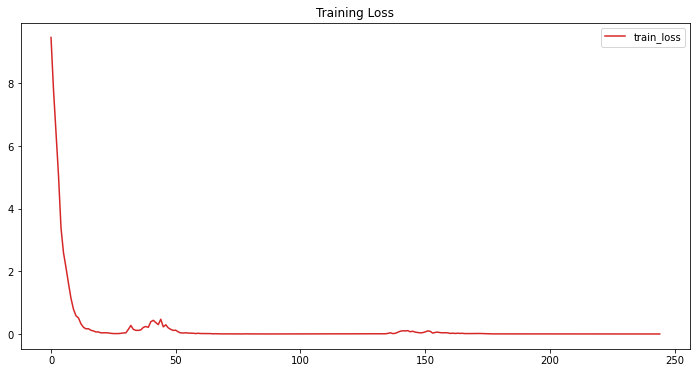

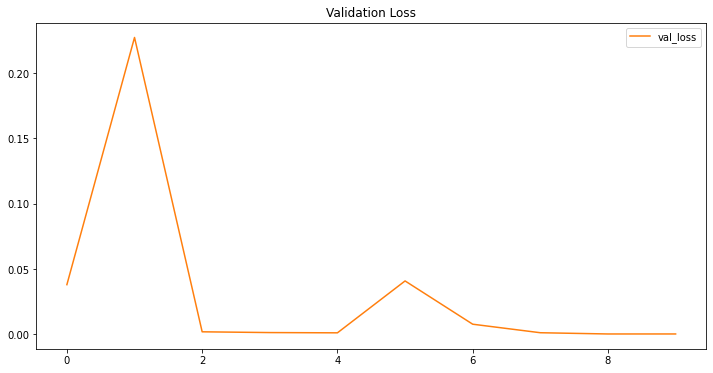

Testing samples: [190]
Testing batches: [1]
Testing Loss: 0.00029317845473997295
ktGRU <class 'known.ktorch.recurrent.rnn.GRU'>
Training samples: [130]
Training batches: [5]
Validation samples: [50]
Validation batches: [1]
Start Training @ 2023-01-14 04:02:54.297550
-------------------------------------------
-------------------------------------------
Final Training Loss: [0.002693520361208357]
Final Validation Loss: [0.0031664473935961723]
End Training @ 2023-01-14 04:03:17.158374, Elapsed Time: [0:00:22.860824]


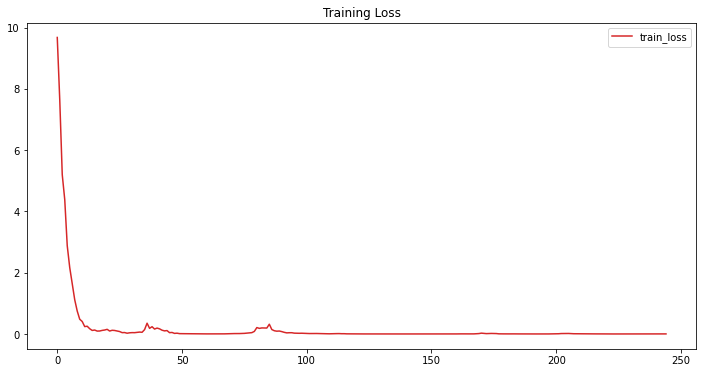

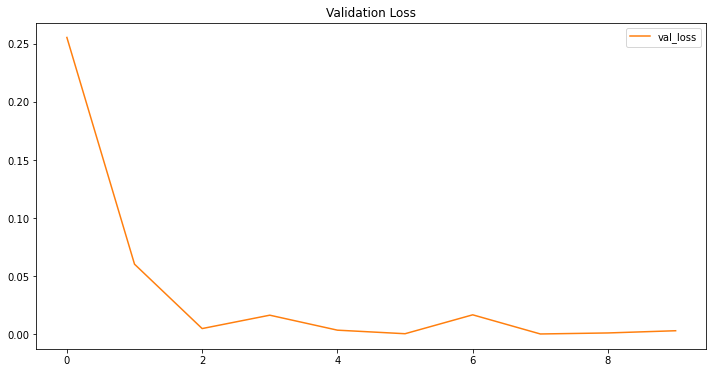

Testing samples: [190]
Testing batches: [1]
Testing Loss: 0.0034144117962569
ktGRUc <class 'known.ktorch.recurrent.rnnc.GRUC'>
Training samples: [130]
Training batches: [5]
Validation samples: [50]
Validation batches: [1]
Start Training @ 2023-01-14 04:03:17.329103
-------------------------------------------
-------------------------------------------
Final Training Loss: [0.01440451918169856]
Final Validation Loss: [0.016977541148662567]
End Training @ 2023-01-14 04:03:35.667047, Elapsed Time: [0:00:18.337944]


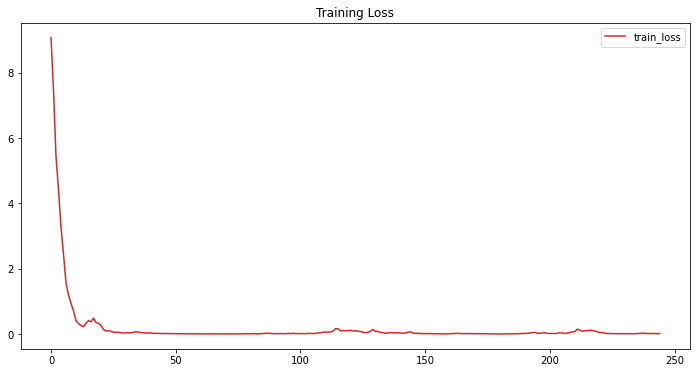

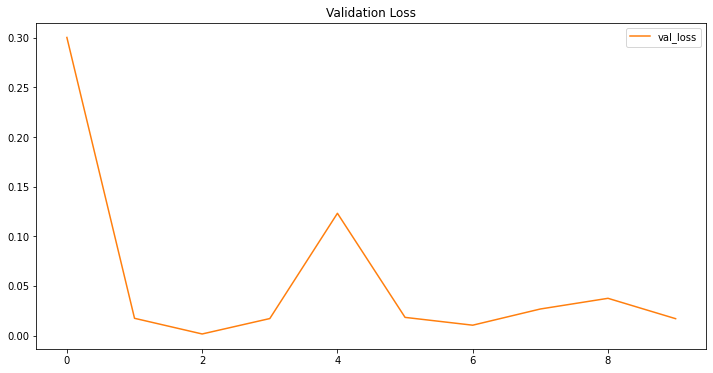

Testing samples: [190]
Testing batches: [1]
Testing Loss: 0.016667192801833153
ttLSTM <class 'torch.nn.modules.rnn.LSTM'>
Training samples: [130]
Training batches: [5]
Validation samples: [50]
Validation batches: [1]
Start Training @ 2023-01-14 04:03:35.864047
-------------------------------------------
-------------------------------------------
Final Training Loss: [0.10355892479419708]
Final Validation Loss: [0.05733060836791992]
End Training @ 2023-01-14 04:03:48.930467, Elapsed Time: [0:00:13.066420]


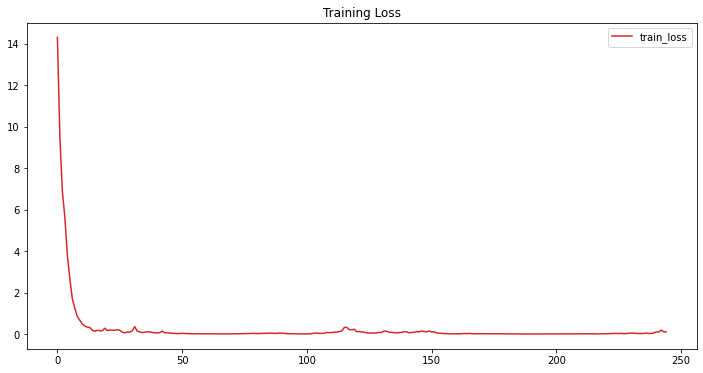

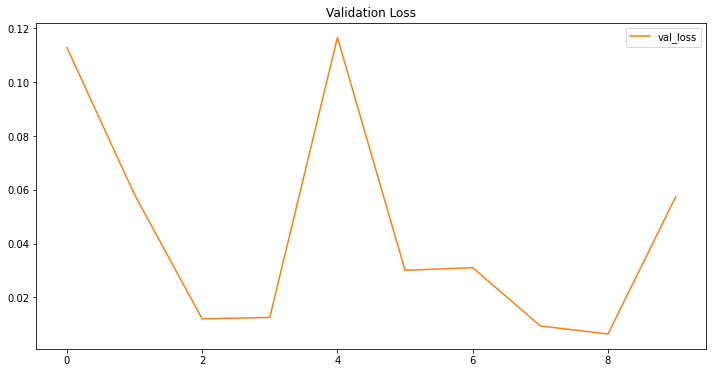

Testing samples: [190]
Testing batches: [1]
Testing Loss: 0.06989586353302002
ktLSTM <class 'known.ktorch.recurrent.rnn.LSTM'>
Training samples: [130]
Training batches: [5]
Validation samples: [50]
Validation batches: [1]
Start Training @ 2023-01-14 04:03:49.134578
-------------------------------------------
-------------------------------------------
Final Training Loss: [0.007048471365123987]
Final Validation Loss: [0.01173196081072092]
End Training @ 2023-01-14 04:04:18.220386, Elapsed Time: [0:00:29.085808]


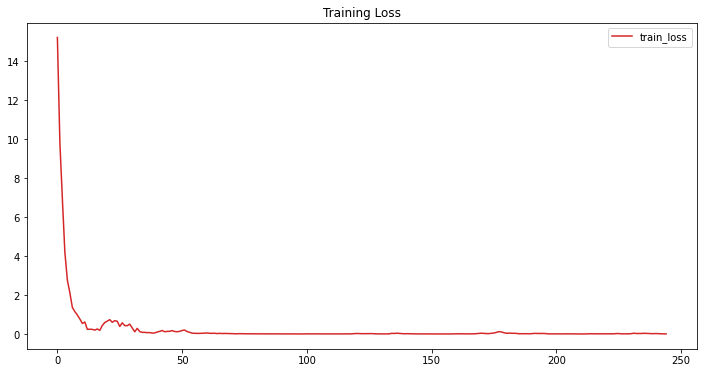

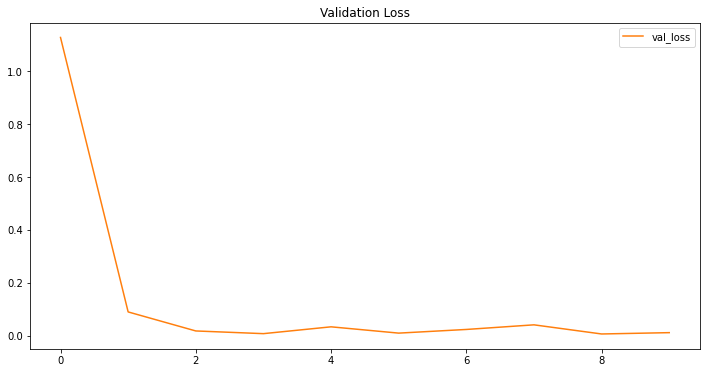

Testing samples: [190]
Testing batches: [1]
Testing Loss: 0.010098644532263279
ktLSTMv <class 'known.ktorch.recurrent.rnnc.LSTMC'>
Training samples: [130]
Training batches: [5]
Validation samples: [50]
Validation batches: [1]
Start Training @ 2023-01-14 04:04:18.436915
-------------------------------------------
-------------------------------------------
Final Training Loss: [0.0010069411597214638]
Final Validation Loss: [0.001545333070680499]
End Training @ 2023-01-14 04:04:40.677437, Elapsed Time: [0:00:22.240522]


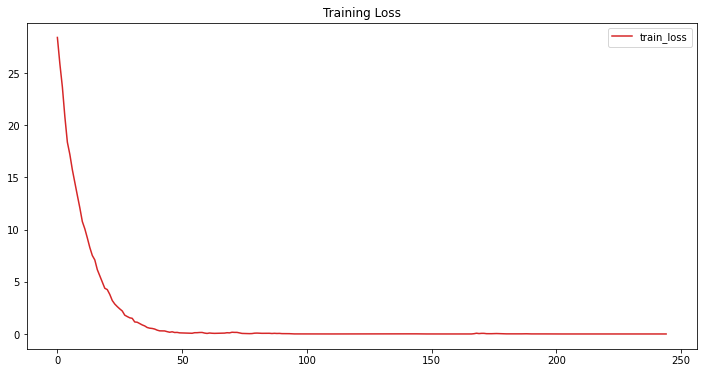

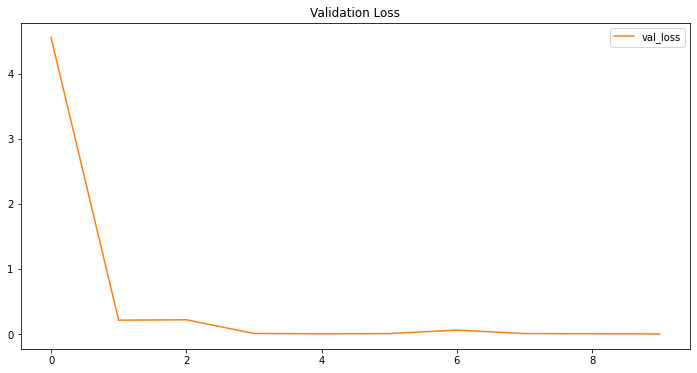

Testing samples: [190]
Testing batches: [1]
Testing Loss: 0.0015283216489478946
ktJANET <class 'known.ktorch.recurrent.rnn.JANET'>
Training samples: [130]
Training batches: [5]
Validation samples: [50]
Validation batches: [1]
Start Training @ 2023-01-14 04:04:40.869437
-------------------------------------------
-------------------------------------------
Final Training Loss: [0.0010461636702530086]
Final Validation Loss: [0.0007147772121243179]
End Training @ 2023-01-14 04:04:58.187698, Elapsed Time: [0:00:17.318261]


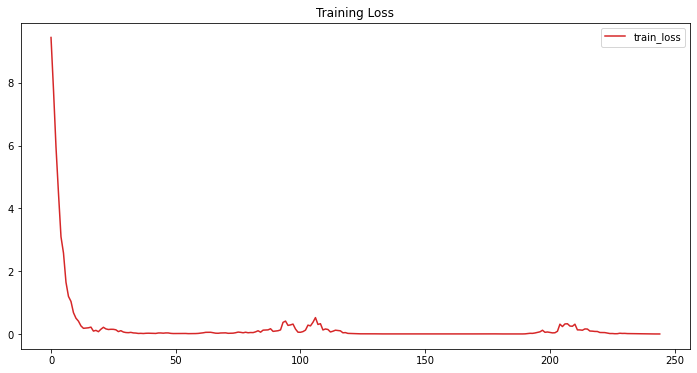

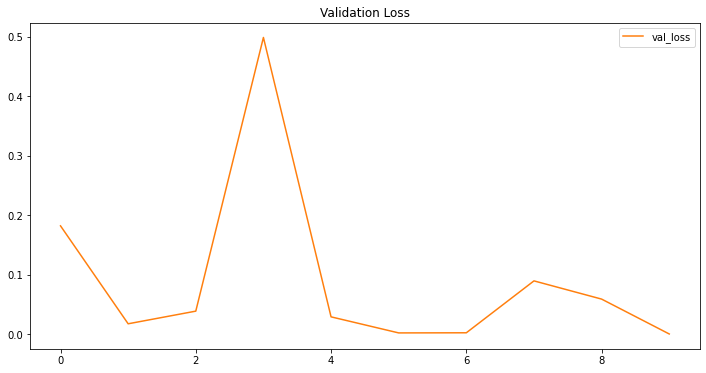

Testing samples: [190]
Testing batches: [1]
Testing Loss: 0.0007609362946823239
ktJANETc <class 'known.ktorch.recurrent.rnnc.JANETC'>
Training samples: [130]
Training batches: [5]
Validation samples: [50]
Validation batches: [1]
Start Training @ 2023-01-14 04:04:58.376698
-------------------------------------------
-------------------------------------------
Final Training Loss: [0.031991987861692904]
Final Validation Loss: [0.037473708391189575]
End Training @ 2023-01-14 04:05:12.652174, Elapsed Time: [0:00:14.275476]


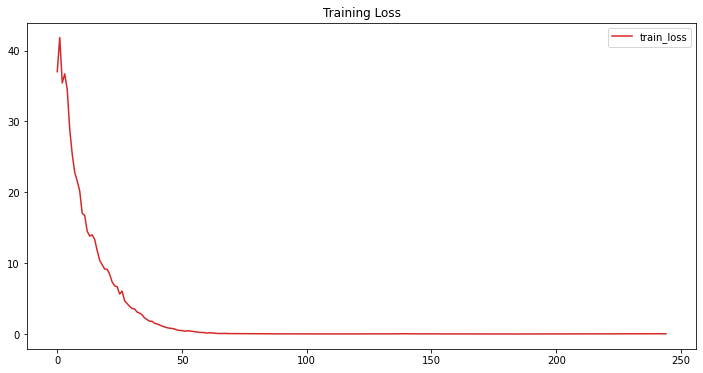

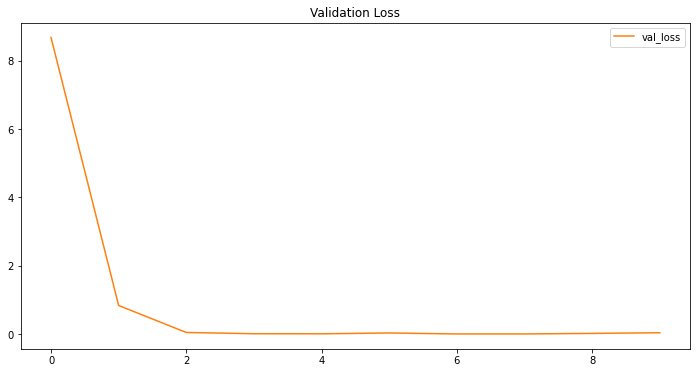

Testing samples: [190]
Testing batches: [1]
Testing Loss: 0.04788128286600113
ktMGU <class 'known.ktorch.recurrent.rnn.MGU'>
Training samples: [130]
Training batches: [5]
Validation samples: [50]
Validation batches: [1]
Start Training @ 2023-01-14 04:05:12.833250
-------------------------------------------
-------------------------------------------
Final Training Loss: [0.0003643221949459985]
Final Validation Loss: [0.0005447276635095477]
End Training @ 2023-01-14 04:05:30.566303, Elapsed Time: [0:00:17.733053]


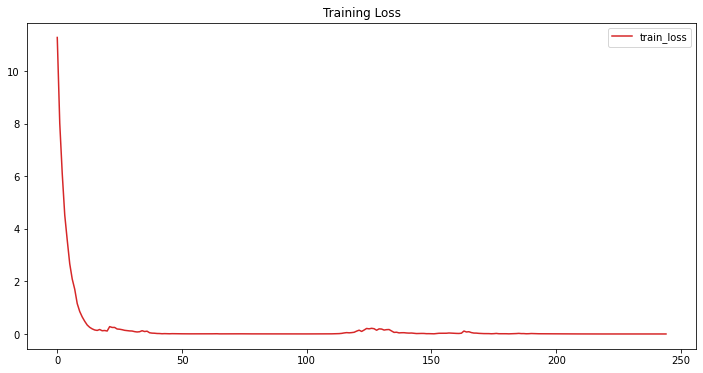

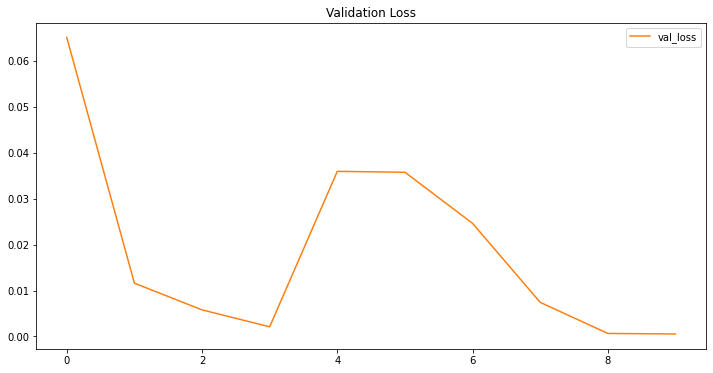

Testing samples: [190]
Testing batches: [1]
Testing Loss: 0.0005072393687441945
ktMGUc <class 'known.ktorch.recurrent.rnnc.MGUC'>
Training samples: [130]
Training batches: [5]
Validation samples: [50]
Validation batches: [1]
Start Training @ 2023-01-14 04:05:30.764314
-------------------------------------------
-------------------------------------------
Final Training Loss: [0.001856918924022466]
Final Validation Loss: [0.0007749194046482444]
End Training @ 2023-01-14 04:05:45.924909, Elapsed Time: [0:00:15.160595]


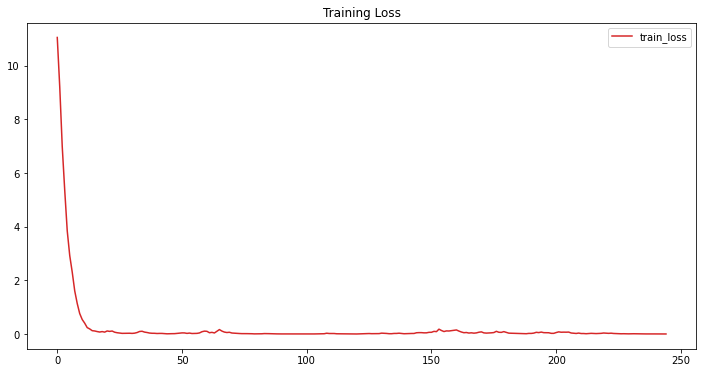

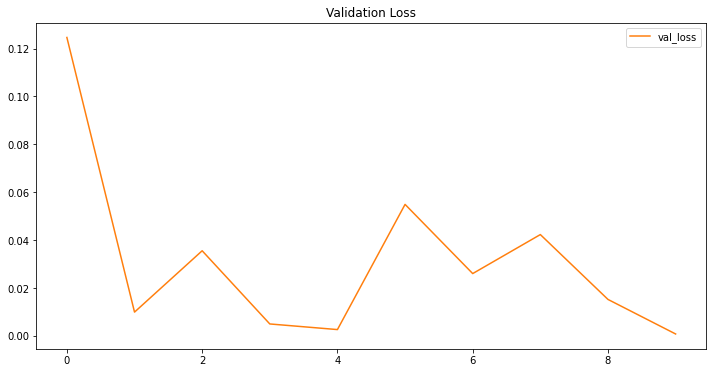

Testing samples: [190]
Testing batches: [1]
Testing Loss: 0.0008650410454720259


In [4]:
test_loss={}
for key,(rnm, rnc) in rnndict.items():
    print(key, rnm.rnn_class)
    model=rnm
    epochs = 250
    batch_size=32
    shuffle=True
    validation_freq = int(epochs/10)
    criterion=nn.MSELoss()
    lr = 0.005
    weight_decay = 0.0
    optimizer=oo.Adam(rnm.parameters(), lr=lr, weight_decay=weight_decay)
    lrs=oo.lr_scheduler.LinearLR(optimizer, start_factor= 1.0, end_factor=0.7, total_iters=epochs)

    early_stop_train=kt.QuantiyMonitor('TrainLoss', patience=50, delta=0.00001)
    early_stop_val=kt.QuantiyMonitor('ValLoss', patience=50, delta=0.00001)
    #checkpoint_freq=int(epochs/4)
    save_path=f'{key}.rnn'
    loss_plot_start = int(epochs/50)

    trainer = kt.Trainer(model)
    trainer.optimizer=optimizer
    trainer.criterion=criterion

    trainer.fit(training_data=ds_train, validation_data=ds_val, 
                epochs=epochs, batch_size=batch_size,shuffle=shuffle,validation_freq=validation_freq,
                save_path=save_path, verbose=1)

    trainer.plot_results(loss_plot_start=loss_plot_start)

    mtl, tl = trainer.evaluate(ds_test)

    test_loss[key] = mtl
    print('=================================================')

# Reults

nnRNN:	0.0008275608415715396
ktRNN:	0.005452102981507778
ktRNNc:	0.03957553580403328
nnGRU:	0.00029317845473997295
ktGRU:	0.0034144117962569
ktGRUc:	0.016667192801833153
ttLSTM:	0.06989586353302002
ktLSTM:	0.010098644532263279
ktLSTMv:	0.0015283216489478946
ktJANET:	0.0007609362946823239
ktJANETc:	0.04788128286600113
ktMGU:	0.0005072393687441945
ktMGUc:	0.0008650410454720259


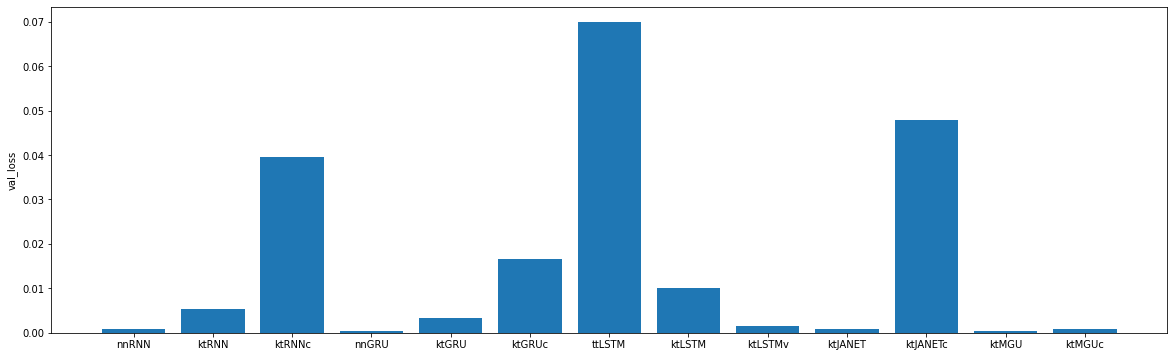

In [5]:
y = []
l = []
for k,v in test_loss.items():
    print(f'{k}:\t{v}')
    y.append(v)
    l.append(k)

x= range(len(test_loss))

plt.figure(figsize=(20,6))
plt.bar(x , y )
plt.xticks(x, l)
plt.ylabel('val_loss')
plt.show()

# Test

In [6]:
res = {}
for key,(rnm, rnc) in rnndict.items():
    print(rnm.rnn_class)
    rnm.eval()
    with tt.no_grad():
        dl = iter(ds_test.dataloader(batch_size=int(len(ds_test)*0.2)))
        Xv, Yv = next(dl)
        Pv = rnm(Xv)
        res[key]=(Pv, rnc) #print(Xv.shape, Yv.shape, Pv.shape)



<class 'torch.nn.modules.rnn.RNN'>
<class 'known.ktorch.recurrent.rnn.ELMAN'>
<class 'known.ktorch.recurrent.rnnc.ELMANC'>
<class 'torch.nn.modules.rnn.GRU'>
<class 'known.ktorch.recurrent.rnn.GRU'>
<class 'known.ktorch.recurrent.rnnc.GRUC'>
<class 'torch.nn.modules.rnn.LSTM'>
<class 'known.ktorch.recurrent.rnn.LSTM'>
<class 'known.ktorch.recurrent.rnnc.LSTMC'>
<class 'known.ktorch.recurrent.rnn.JANET'>
<class 'known.ktorch.recurrent.rnnc.JANETC'>
<class 'known.ktorch.recurrent.rnn.MGU'>
<class 'known.ktorch.recurrent.rnnc.MGUC'>


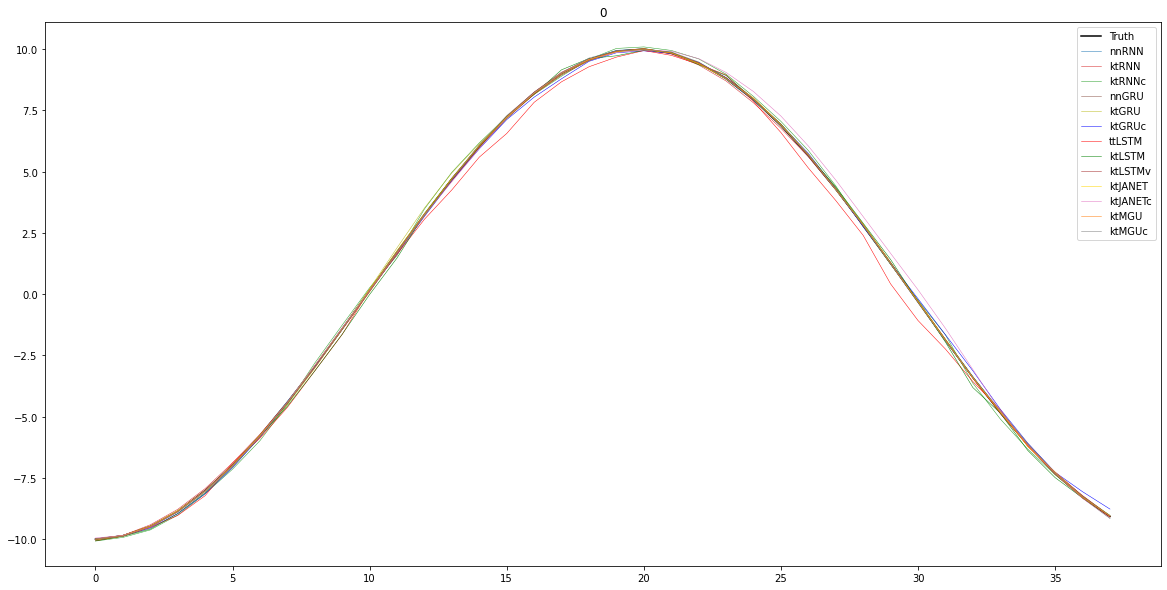

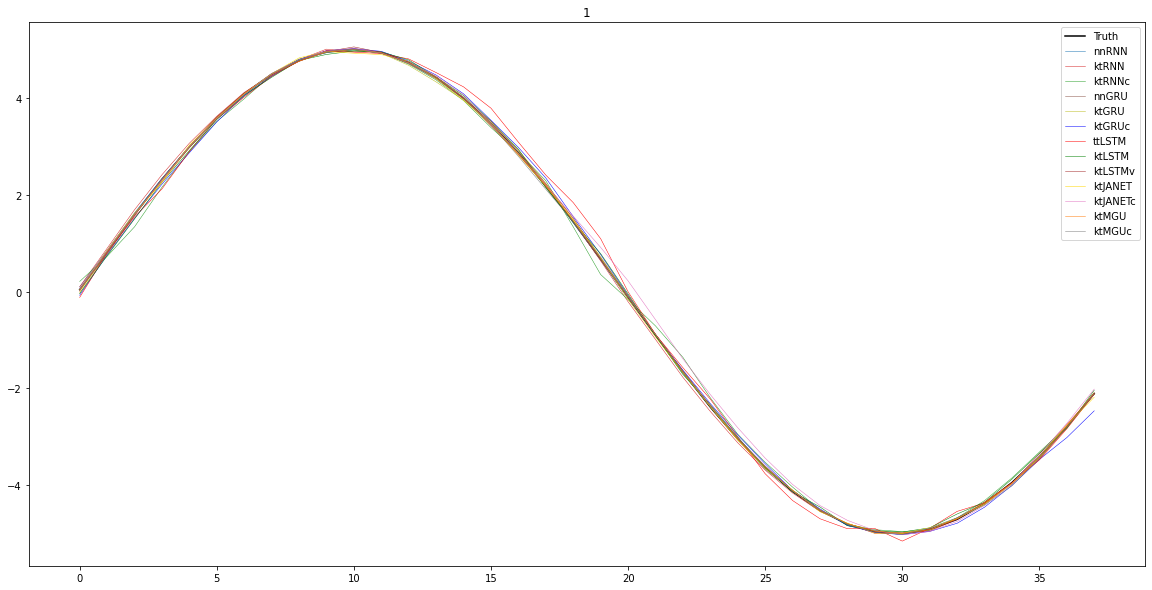

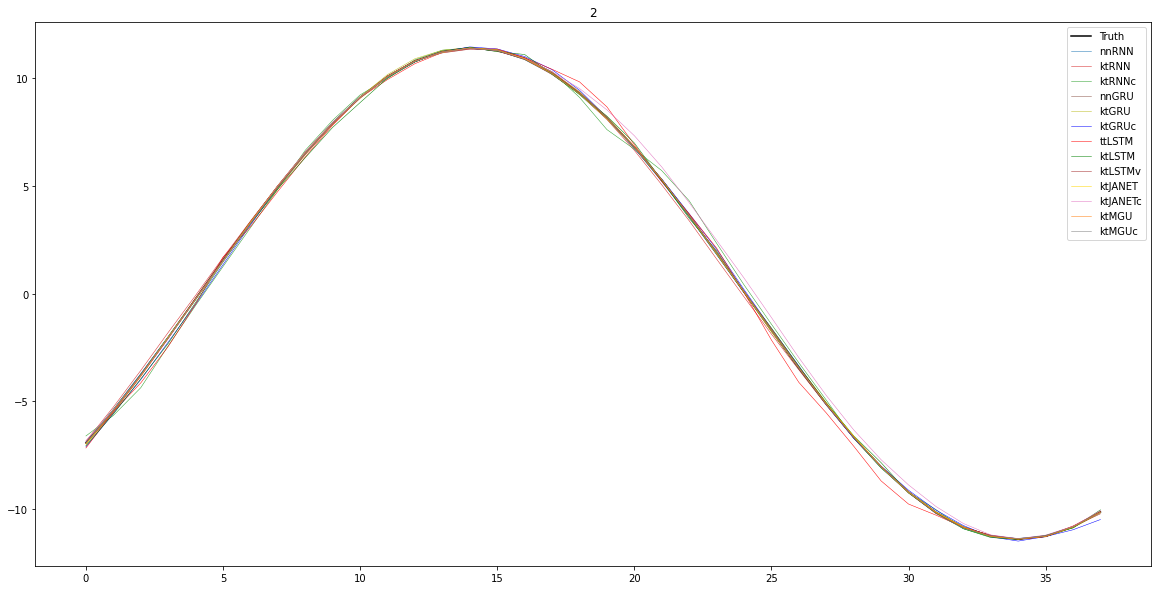

In [7]:
for i in range(input_size):
    plt.figure(figsize=(20,10))
    plt.title(f'{i}')
    
    plt.plot(Yv[:,i], color='black', label='Truth')
    for key,(r,c) in res.items():
        plt.plot(r[:,i], color=c, label=f'{key}', linewidth=0.5)
    plt.legend()
    plt.show()
    plt.close()
    print('=================================================')